In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataset_path = "data.csv"
dataset = pd.read_csv(dataset_path, delimiter=';')
print(dataset.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [16]:
print(dataset.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [17]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [22]:
print(dataset.duplicated().sum())
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    if column != 'Target': 
        encoder = LabelEncoder()
        dataset[column] = encoder.fit_transform(dataset[column])
        label_encoders[column] = encoder

0


In [23]:
scaler = StandardScaler()
numeric_features = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.

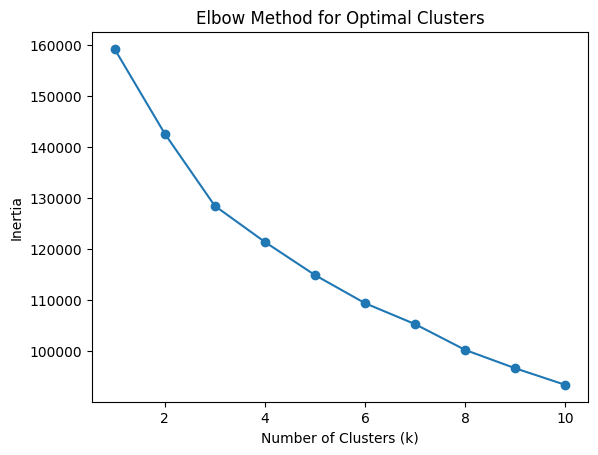

In [24]:
cluster_inertia = []
cluster_range = range(1, 11)

for num_clusters in cluster_range:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(dataset.drop(columns=['Target']))
    cluster_inertia.append(kmeans_model.inertia_)

plt.plot(cluster_range, cluster_inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0       2
1       0
2       2
3       0
4       0
       ..
4419    0
4420    0
4421    0
4422    0
4423    0
Name: Cluster_Group, Length: 4424, dtype: int32


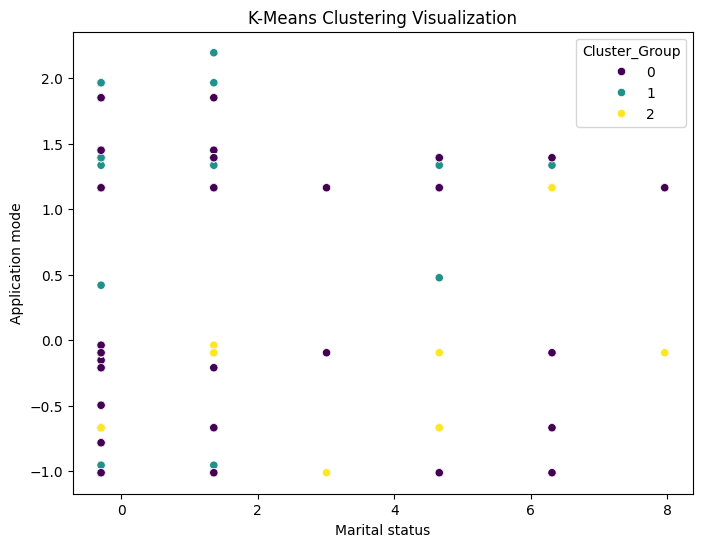

In [26]:
optimal_kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster_Group'] = optimal_kmeans.fit_predict(dataset.drop(columns=['Target']))
print(dataset['Cluster_Group'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x=dataset.columns[0], y=dataset.columns[1], hue='Cluster_Group', palette='viridis')
plt.title("K-Means Clustering Visualization")
plt.show()

In [9]:
print(dataset['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [12]:
X = data.drop(columns=['Target'])  
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.70      0.75       441
    Enrolled       0.38      0.27      0.32       245
    Graduate       0.71      0.85      0.77       642

    accuracy                           0.69      1328
   macro avg       0.63      0.61      0.61      1328
weighted avg       0.68      0.69      0.68      1328

Accuracy: 0.6935240963855421


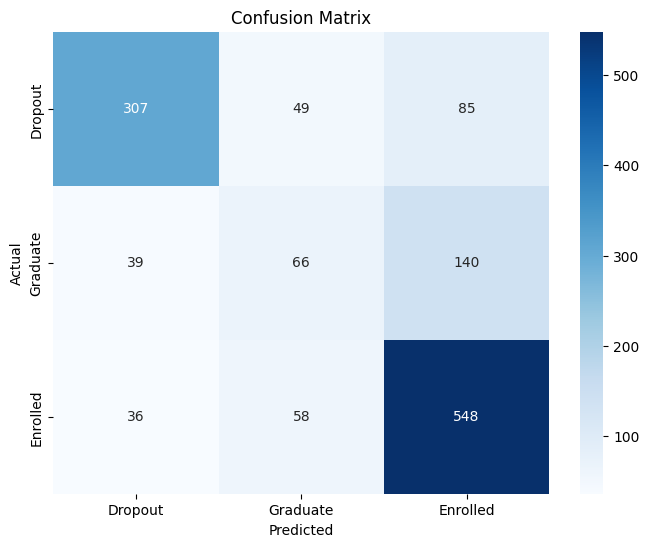

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()